### 1. Randome Walk Process -

RWP - When there is equal chance of going up or down by a random number.

$y_t = C + y_{t-1} + e_t$

$e_t$ is the random number or the white noise. Realization of SND with variance 1 and mean 0.

if C is non-zero then this is RW with drift

### 1.1 Simulating RWP

Let's consider that C is zero, then we have

$y_t = y_{t-1} + e_t$

$y_0$ is first value of sequence which is eaual to 0.

$y_1 = y_0 + e_1 = 0 + e_1 = e_1$

$y_2 = y_1 + e_2 = e_1 + e_2$

$y_3 = y_2 + e_3 = e_1 + e_2 + e_3$

Now, we can see pattern and say that the value at time t is simplay the sum of white noise from t=0 to t=t

$y_t = \sum_{t=1}^{T} e_{t}$

At amny point in time t, the value of our simulated time series will be cumulative sum of a series of random numbers.

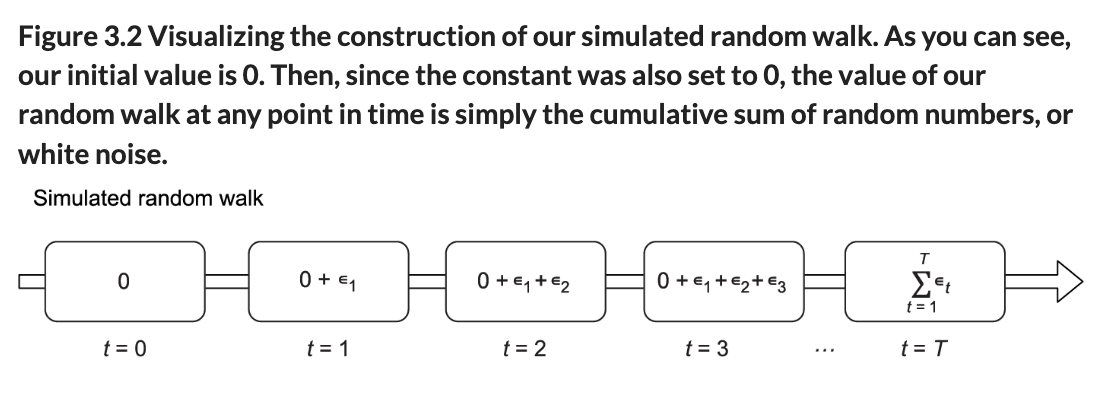

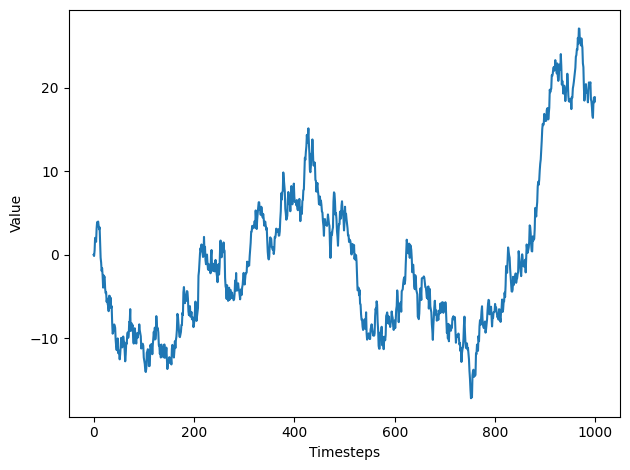

In [3]:
# generate 100 samples
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
steps = np.random.standard_normal(1000) # Draw random samples from SND
steps[0] = 0 # first value to 0

random_walk = np.cumsum(steps) # sum of whitenoise for each timestep

fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
# Notice a positive trend, and followed by negative trend
# We have both, plus sudden changes and long periods where trend is observed


### 2. Identifying a random walk

A RW is a series whose first difference is stationary and uncorrelated. 

### 2.1 Stationarity

A stationarity time series is one whose statistical properties do not change over time (constant mean, variance, autocorrelation)

if data is non-stationariy, then its properties are going to change through time, this means that we can not possibly derive a function of future values as a function of past values, since coefficient change at each point in time.

To make a timeseries stationary, we do transformation, that stabilizes its means and variance. Differencing - it removes the trends or seasonal effects.(constant mean through time)

Applying log function to series can stabilize its variance

$y^{`}_{t} = y_t - y_{t-1}$

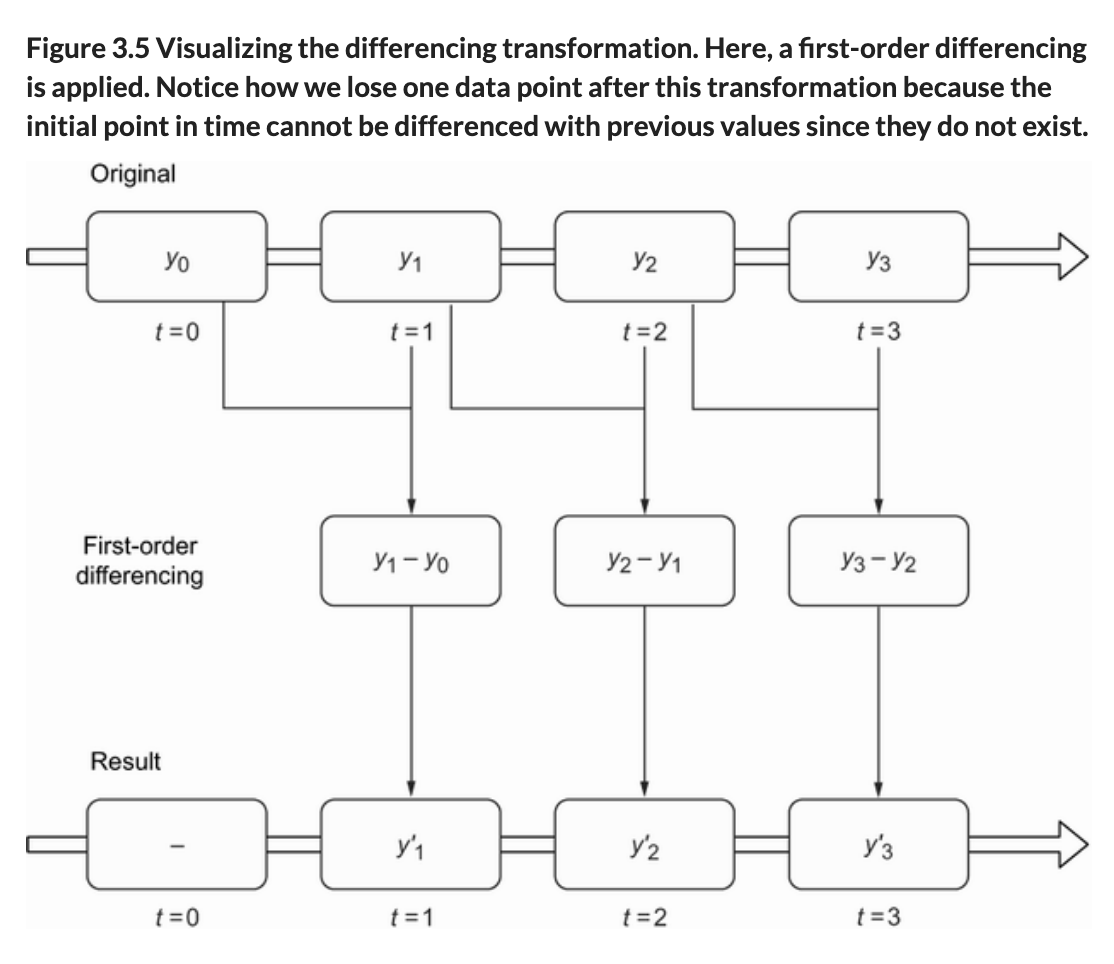

### 2.2 Testing for stationarity

To test whether we need to apply any more transformation to make TS stationarity.

ADF (Augmented Dickey-Fuller) test - By testing the presence of a unit root, if a unit root is present then TS is non-stationary

H0 : There is a unit root present in a TS
H1 : There is no unit root in TS

ADF Statistic is a negative number, the more negative it is, the stronger the rejection of null hypothesis, Also, if p-value is less that 0.05, we can reject null hypothesis and say series is stationary

$y_t = C + a_{1}.y_{t-1} + e_t$

Here, $a_{1}$ is root of the time seires, TS will be stationary if root liew within unit circle (-1, 1)

Non-stationary process has long periods of positive and negative trends. However, the stationary process does not seem to increase or decrease over the long term

### 2.3 The autocorrelation function

Autocorrelation measures the linear relationship between lagged values of a time series.

Autocorrelation coefficient between $y_t$ and $y_{t-1}$. , here lag is equal to 1 and the coefficient would be denoated as $r_1$

When we plot ACF, the coefficient would be dependent variable and lag would be independent

In [5]:
from statsmodels.tsa.stattools import adfuller

# pass array of simulated data, result is list
ADF_result = adfuller(random_walk)

print(f'ADF Statistics: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

# We can not reject H0, Hence TS is non-satationary

ADF Statistics: -0.9659524876918759
p-value: 0.7654789696692579


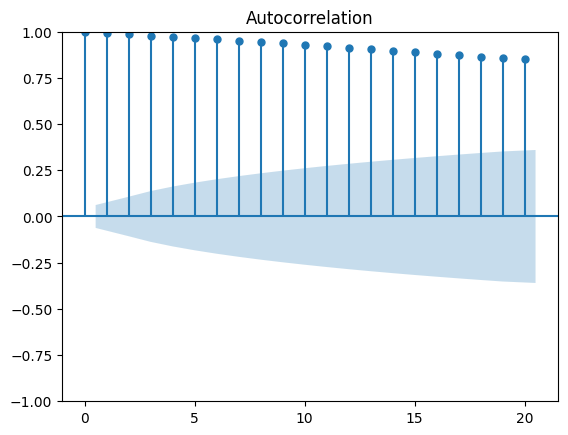

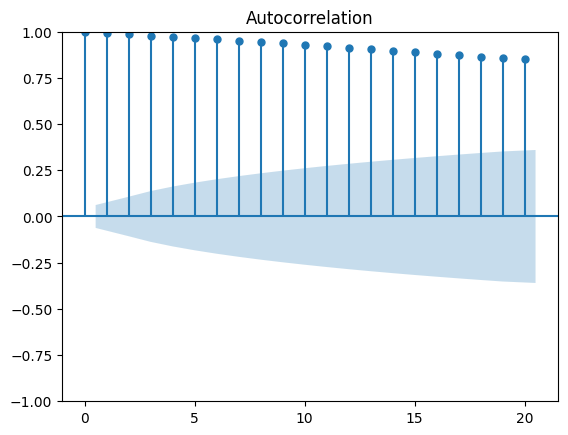

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(random_walk, lags=20)

# Shaded area tells CI, if point is within that
# it is not significantly different from 0
# Otherwise autocorrelation is significant

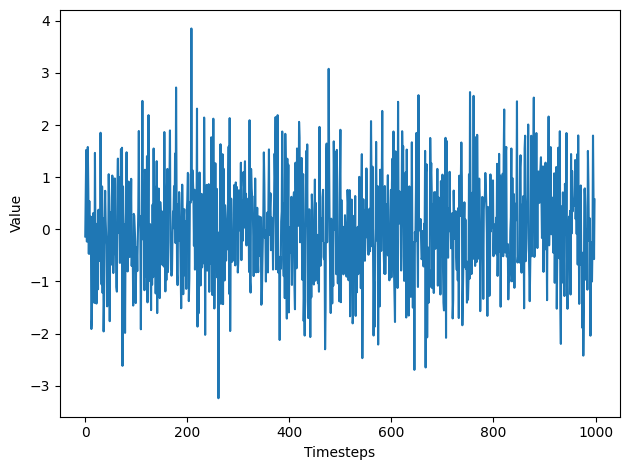

In [9]:
# differencing to make stationary
diff_random_walk = np.diff(random_walk, n=1)

fig, ax = plt.subplots()
ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
# We have removed trend from our series
# Variance is stable

In [11]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistics : {ADF_result[0]}')
print(f'p-value : {ADF_result[1]}')
# We reject H0, and say process has no unit root, thus stationary

ADF Statistics : -31.7893108575606
p-value : 0.0


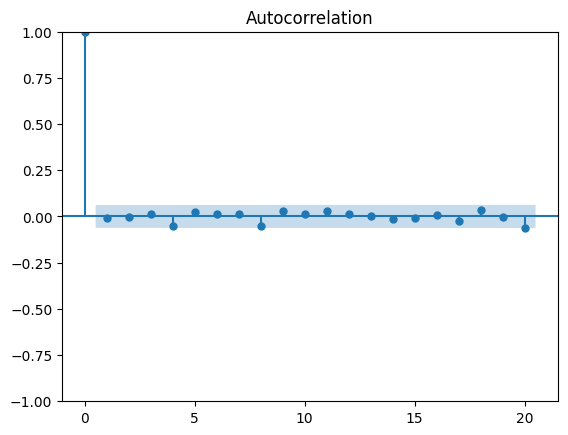

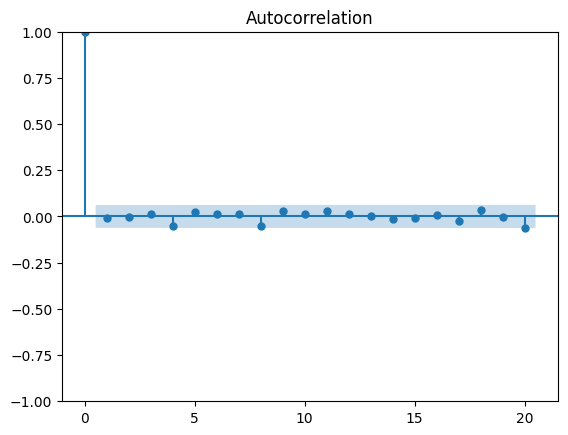

In [13]:
plot_acf(diff_random_walk, lags=20)

# There is no significant autocorrelation coefficient after lag 0
# Stationary process is random and described as white noise

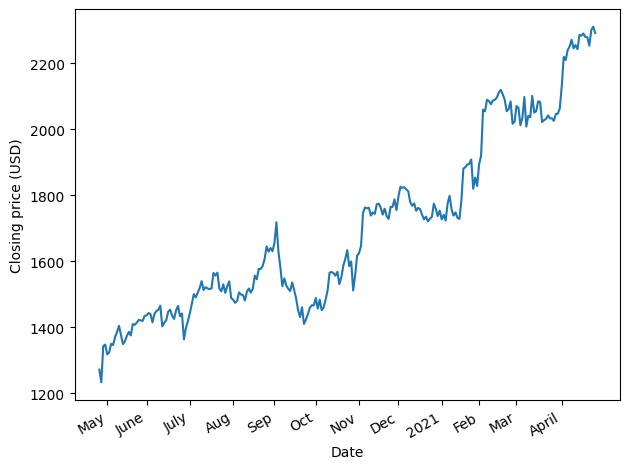

In [16]:
import pandas as pd

df = pd.read_csv('data/GOOGL.csv')

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 2021, 'Feb',
 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()


In [17]:
googl_adf_result = adfuller(df['Close'])

print(f'ADF statistic : {googl_adf_result[0]}')
print(f'p-value : {googl_adf_result[1]}')

ADF statistic : 0.1602504866477152
p-value : 0.9699419435913058


In [18]:
diff_close = np.diff(df['Close'], n=1)

googl_diff_adf_result = adfuller(diff_close)

print(f'ADF statistic : {googl_diff_adf_result[0]}')
print(f'p-value : {googl_diff_adf_result[1]}')

ADF statistic : -5.30343970429522
p-value : 5.386530961454919e-06


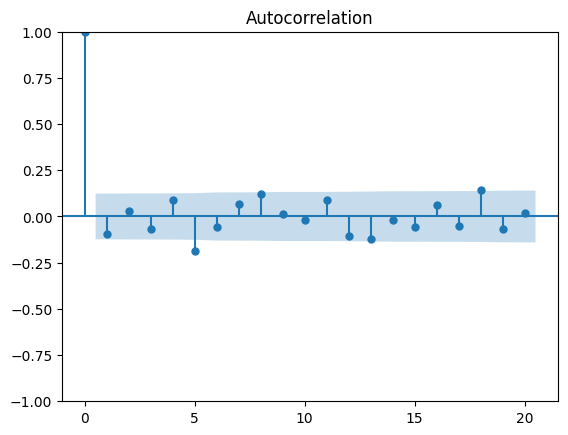

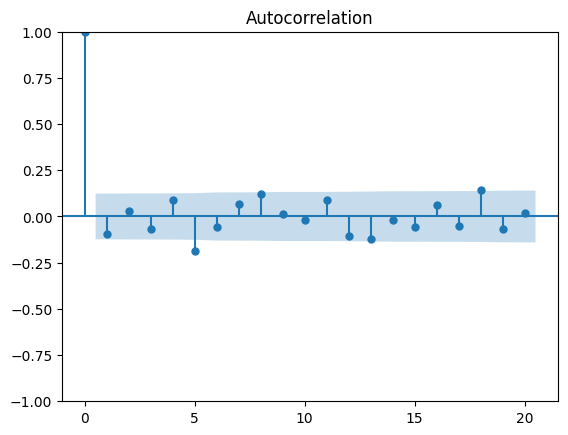

In [19]:
plot_acf(diff_close, lags=20)
# we can safely assume that the coefficients at lags 5 
# and 18 are not significant, because we do not have 
# consecutive significant coefficients

### 3. Forecasting a random walk

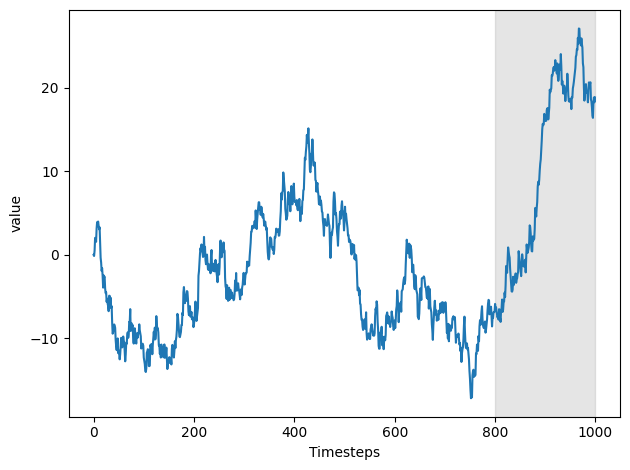

In [20]:
# on a long horizon
df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:] # last 200 values

fig, ax = plt.subplots()
ax.plot(df)
ax.set_xlabel('Timesteps')
ax.set_ylabel('value')
ax.axvspan(800, 1000, color='#808080', alpha = 0.2)

plt.tight_layout()

In [22]:
# forecasting with mean.
mean = np.mean(train.value)
test.loc[:, 'pred_mean'] = mean
test.head()

/var/folders/0l/p7lzlqxn44b036b_3ykx4tlr0000gn/T/ipykernel_62378/2435937007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = mean


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [27]:
# forecasting with last know value of train set
last_value = train.iloc[-1].value
test.loc[:, 'pred_last'] = last_value

test.head()

,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.814947
801,-6.392708,-3.677206,-6.814947,-6.814947
802,-6.296588,-3.677206,-6.814947,-6.814947
803,-6.758863,-3.677206,-6.814947,-6.814947
804,-7.193359,-3.677206,-6.814947,-6.814947


Drift Method - Allow the value to increase or decrease over time, The rate at which values will change in future is equal to that seen in the train set. 

$slope = \frac {\delta y}{\delta x} = \frac {y_f - y_i}{no. of timesteps - 1}$

In [30]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX

print(drift)
# the value of our forecast will slowly decrease over time
# forecast = drift * timestep + yi (initial value)

x_vals = np.arange(801, 1001, 1)
pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift
test.head()

-0.008529346056640632


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


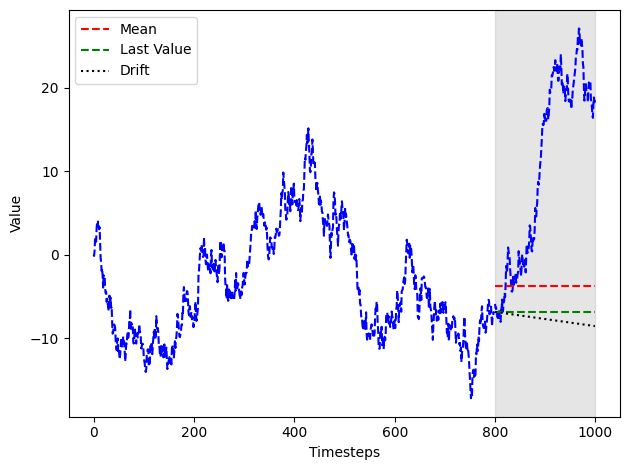

In [31]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b--')
ax.plot(test['value'], 'b--')
ax.plot(test['pred_mean'], 'r--', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last Value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [33]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 466.2172769077409


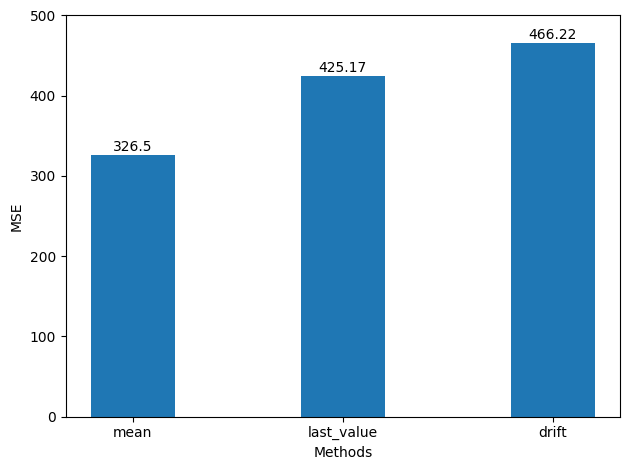

In [35]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

### 3.2 Forecasting the next value

Take initial observed value and use it to predict the next timestep. Once we record a new value, it will be used as a forecast for following timestep


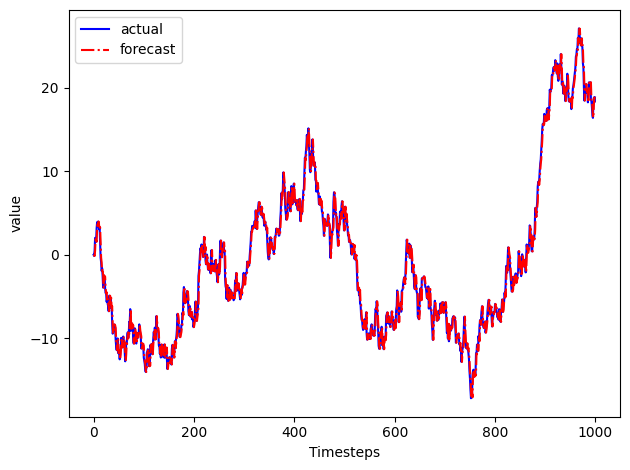

In [36]:
df_shift = df.shift(periods=1) #shifting our data
df_shift.head()

fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('value')

plt.tight_layout()

In [37]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])
print(mse_one_step)

0.9256876651440581


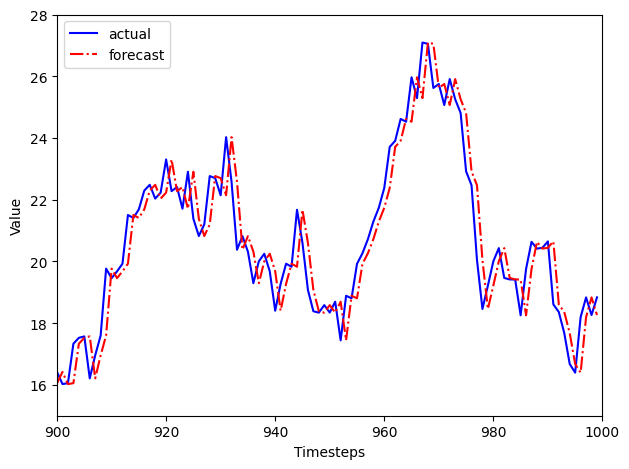

In [38]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(15, 28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()


### Exercises